Image processing involves performing operations on images to enhance them, extract features, or prepare them for other applications like computer vision or machine learning.

It can be broken into two types: • Analog Image Processing: Applied to hard copies like photographs.

• Digital Image Processing: Manipulation of images in digital form using computers.

Common goals: • Noise reduction • Image enhancement • Image restoration • Object detection and recognition

In [6]:
# ##ip 
# 1 - medical field 
# 2 - remote sensing 
# 3 - industrial app 
# 4 - security 
# 5 - robo 
# 6 - multimedia 

In [7]:
##pixel -- an image is made up of tiny elements 
# called pixels 
#each pixel represents an intensity value 

In [8]:
## there are 2types of images 
# 1 - gray scale image-- black and white -- 1 channel -- 0-255 
# 2 - color scale -- rgb image --3 channel 

##---bit depth -- define how many difff intensity level a pixel can represent 
# 1 -- 1-bit -- black and white --- 2 level
# 2 ----8- bit --- 256 levels of gray scale image (0 = black , 255 white)
# 3 ---24 bit colour image --- RGB -- 8 bit for each channel -- 256x256x256 

In [9]:
##lib used for ip 
#1 - opencv 
# c++ lib with python bindings 
# efficient fro real time cv task 
# pip install opencv-python
#2 - pillow 
# simpler python lib 
# good for basic task 
#pip install pillow

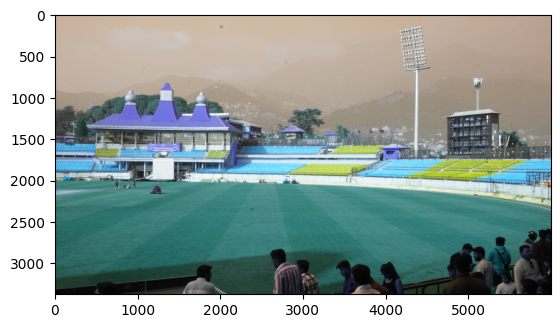

In [10]:
##open cv 
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(r"C:\Users\ksain\Downloads\DSC02552.JPG")
plt.imshow(img)
plt.show()
# cv2.imshow("image",img) ## save the image to disk
# cv2.waitKey(0)   ## wait for any key to be pressed
# cv2.destroyAllWindows()  ## close all windows

In [11]:
##pillow 
from PIL import Image
img1 = Image.open(r"C:\Users\ksain\Downloads\DSC02552.JPG")
# img.show()
print(img1.size) ## total number of pixel 
print(img.shape)    ##dimension(height,width,channel)
print(img.dtype)    ##data type#

(6000, 3376)
(3376, 6000, 3)
uint8


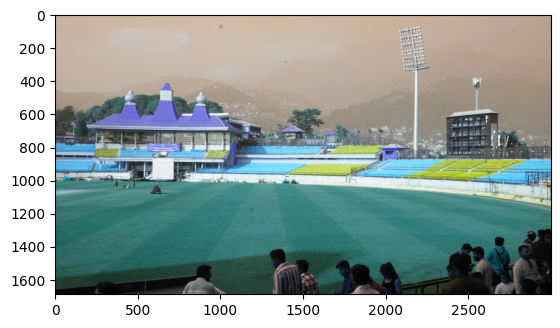

In [12]:
##scaling(resize)-- change the size of an image - either increasing or decreasing
##scaled_img = cv2.resize(img,(width,height))

# scaled_img=cv2.resize(img,(200, 400))
scaled_img = cv2.resize(img , (0, 0), fx=0.5, fy=0.5)
##fx and fy == scaling factors 
##(0,0) -- original size
##height = 200 x 0.5 = 100
plt.imshow(scaled_img)


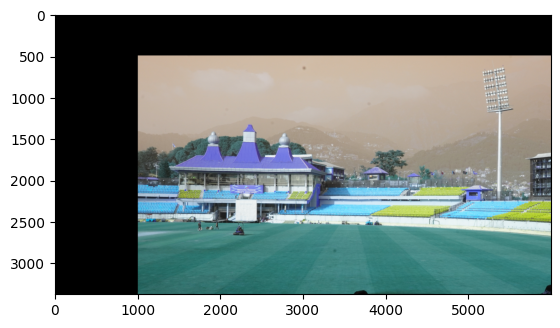

In [13]:
##translation--shift an image vertically or horizontally
import numpy as np 
rows , cols = img.shape[:2]
tx , ty = 1000, 500
##shift right by 1000 and down by 500 
M = np.float32([[1,0,tx],[0,1,ty]])
##[1,0,tx] -- 1 -- keep x -cordinate same 
##0 -- dont mix in thw y - cordinate
##tx - add this amount in x
translated_img = cv2.warpAffine(img,M,(cols,rows))
##wrap affine -- rotation , translation , scaling , shearing
plt.imshow(translated_img)


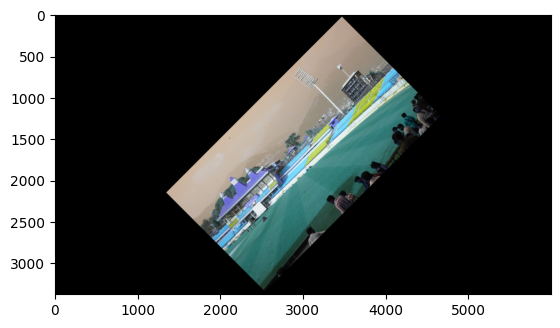

In [14]:
##rotation -- roatate  the image around a center point
center = (cols//2,rows//2)
angle = 45 
scale = 0.5
##zoom in ya zoom out --- 1 == orginal size , <1 == zoom out , >1 == zoom in 
M = cv2.getRotationMatrix2D(center,angle,scale)
rotated_img = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(rotated_img)



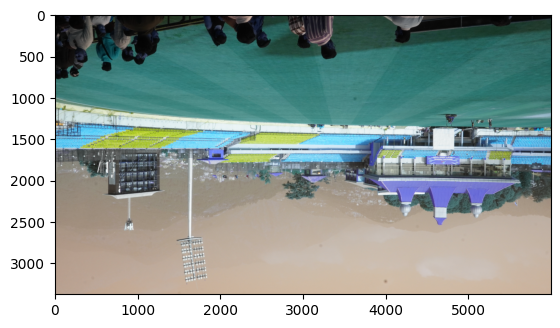

In [15]:
##flipping -- means mirroring the image across an axis 
flipped_img = cv2.flip(img,-1)
##flipcode 
##0 - vertical 
##1 - horizontal 
##-1 -- both 
plt.imshow(flipped_img)

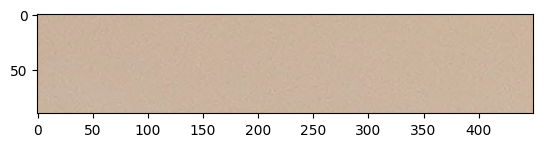

In [16]:
#cropping an image 
##cropping is just slicing an array 
# cropped_img  = image[y1:y2,x1:x2]

cropped = img[10:100, 50:500]
plt.imshow(cropped)